# Skriftlig innlevering 2, Oppgave 2 (av 4)

## Oppgave 2 *

La $X$ være en stokastisk variabel som beskriver hvor lang tid en komponent har fungert i det den svikter.
  Vi kaller da $X$ for <em>levetiden</em> for komponenten.

  Levetiden $X$ (målt i antall år) til en bestemt type mekaniske komponenter har vist seg å
  følge en fordeling med kumulativ fordelingsfunksjon gitt ved
  \begin{align*}
    F_X(x) = 1 - \exp\left\{ -\frac{x^2}{\alpha}\right\}; x\geq 0,
  \end{align*}
  der $\alpha$ er en parameter som beskriver kvaliteten til komponentene.


### Deloppgave a)

  * Finn sannsynlighetstettheten til $X$, $f_X(x)$. Eventuelt hent denne fra din besvarelse av 
Skriftlig innlevering 1.
  * Finn en formel for $E[X]$ (som funksjon av $\alpha$). Du kan her uten bevis benytte at 
  
  $$
  \int_{-\infty}^\infty e^{-x^2}dx = \sqrt{\pi}.
  $$

### Deloppgave b)

La $U\sim \mbox{Unif}[0,1]$.

   * Finn en formel for hvordan man fra $U$ kan definere $X$ slik at kumulativ fordeling for $X$
      blir som angitt over.
   * Skriv en python-funksjon som genererer $n$ realisasjoner av $X$. La funksjonen ha to 
    input-parametre, antall realisasjoner $n$ og verdien til kvalitetsparameteren $\alpha$. 
    Benytt funksjonen til å generere (for eksempel) $n=10\ 000\ 000$ realisasjoner av $X$ med 
    (for eksempel) $\alpha=1$, og lag et sannsynlighetshistogram for de genererte verdiene. Spesifiser at histogrammet skal ha 100 intervaller, se kode under.
    Plott også sannsynlighetstettheten $f_X(x)$ i samme plott som
    sannsynlighetshistogrammet. Ser det ut til at du har generert 
    realisasjoner av $X$ på korrekt måte?
 

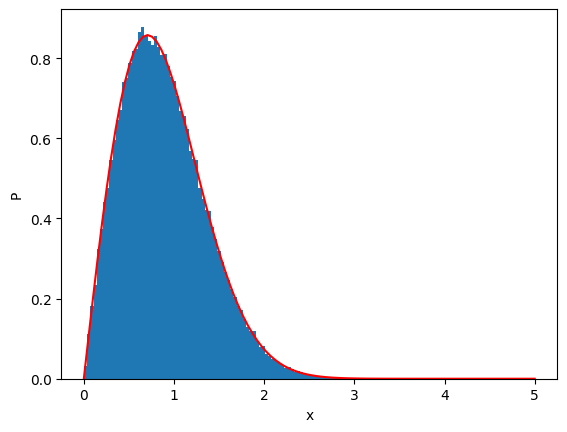

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def simX(n,alpha):
    u = np.random.uniform(size=n) #array med n elementer.
    x = np.sqrt(alpha * -np.log(1-u))  # fyll inn formelen du fant for x
    #invers av kumulativ fordeling F_x
    return x


# Sett antall realisasjoner og verdien til alpha
n = 100000
alpha = 1

# simuler realisasjoner av X
x = simX(n,alpha)

# Lag sannsynlighetshistogram for de simulerte verdiene
plt.hist(x, density=True,bins=100)  #density=True gjør at vi får et sannsynlighetshistogram

# Angi navn på aksene
plt.xlabel("x")
plt.ylabel("P")

x_1 = np.linspace(0,5,100)

# Regn ut og plott sannsynlighetstettheten til X på samme plott
f_x = lambda x : (2/alpha * x * np.exp(-x**2/alpha)) 
plt.plot(x_1, f_x(x_1), color="red") 

# Avslutt med å generere alle elementene du har plottet
plt.show()

#### Her er deloppgave b) slutt.

Et instrument inneholder fem komponenter av denne typen, to av disse komponentene har kvalitetsparameter $\alpha = 1$ og
  de andre tre komponentene har $\alpha=1.2$. De fem komponentene svikter uavhengig av hverandre og instrumentet fungerer
  så lenge minst tre av de fem komponentene fungerer. La $Y$ betegne levetiden til instrumentet.


# Deloppgave c)

Skriv en python-funksjon som genererer $n$ realisasjoner av $Y$. 
Funksjonen skal ha en input-parameter, nemlig antall
      realisasjoner $n$. Benytt funksjonen til å genererere 
    (for eksempel) $n=10\ 000$ realisasjoner av $Y$, og lag et
      sannsynlighetsistogram for de genererte verdiene.

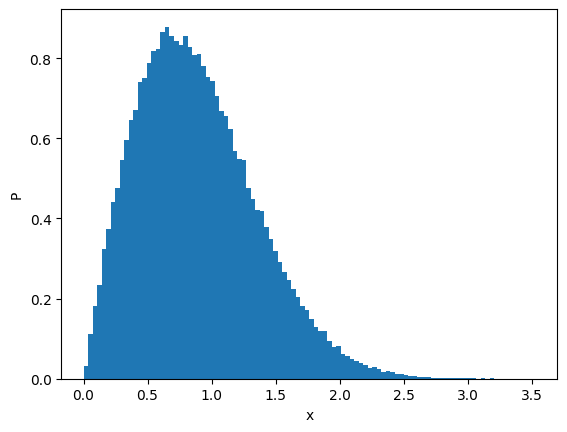

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# definer funksjonen og benytt denne som angitt i oppgaven

def simY(n):
    arr = simX(n,1)
    arr += (simX(n,1) + simX(n,1))
    arr += (simX(n,1.2) + simX(n,1.2))

    return arr

y = simY(1000000)

# Lag sannsynlighetshistogram for de simulerte verdiene
plt.hist(x, density=True,bins=100)  #density=True gjør at vi får et sannsynlighetshistogram

# Angi navn på aksene
plt.xlabel("x")
plt.ylabel("P")

plt.show()

# Deloppgave d)

Benytt python-funksjonen du har implementert over til å finne tilnærmede 
verdier for $E[Y]$, $\mbox{SD}[Y]$, $P(Y\geq 2)$ og $P(Y\geq 2|Y\geq 1)$.

In [42]:
# Fra nå av må du selv huske på å inkludere pakkene du skal bruke selv

n = 10000
y = simY(n)

E_Y = sum(y)/n

P_Yge2 = len(y[y>=2])/n

P_Yge2givenYge1 = len(y[y>=2])/len(y[y>=1])

print(E_Y)
print(P_Yge2)
print(P_Yge2givenYge1)

4.5899968912664395
0.9973
0.9973
